In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
subsDf = pd.read_csv("/content/drive/MyDrive/FODS__FP/Dataset/subsDf.csv", low_memory=False)

In [4]:
# Selecting relevant features for clustering
features_to_use = ['country', 'operator', 'service', 'source', 'status',
                   'success_billing']

In [5]:
# Filtering the dataset to include only the selected features
data_selected = subsDf[features_to_use]

In [6]:
# Handling missing values - filling with mode for categorical and median for numerical data
data_selected = data_selected.fillna({
    'country': data_selected['country'].mode()[0],
    'operator': data_selected['operator'].mode()[0],
    'service': data_selected['service'].mode()[0],
    'source': data_selected['source'].mode()[0],
    'status': data_selected['status'].median(),
    'success_billing': data_selected['success_billing'].median(),
})

In [7]:
# Preprocessing: OneHotEncoder for categorical features and StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['status', 'success_billing']),
        ('cat', OneHotEncoder(), ['country', 'operator', 'service', 'source'])
    ])

In [8]:
# Converting categorical columns to string type to avoid mixed type issues during encoding
for col in ['country', 'operator', 'service', 'source']:
    data_selected[col] = data_selected[col].astype(str)

In [9]:
# Fitting and transforming the data
processed_data = preprocessor.fit_transform(data_selected)

In [10]:
# Checking the shape of the processed data
processed_data.shape

(308911, 39)

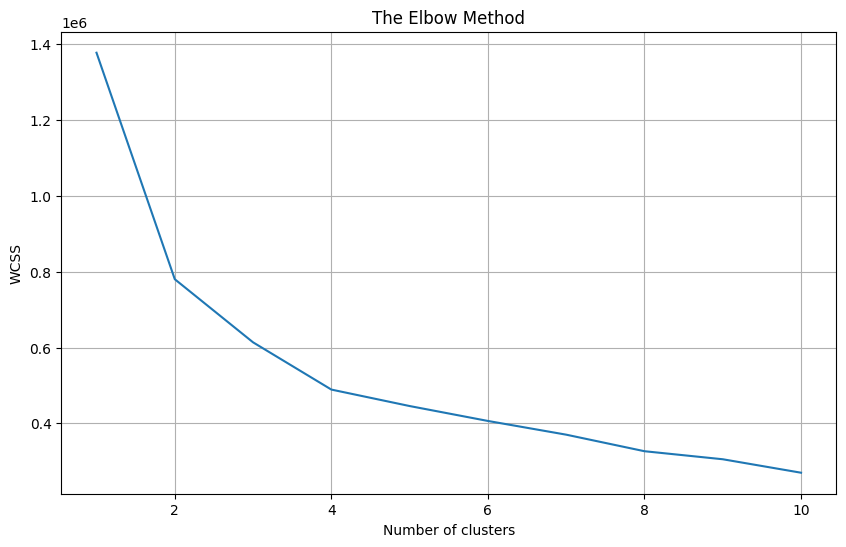

In [11]:
# Determining the optimal number of clusters using the Elbow Method for KMeans
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

# Plotting the results to observe 'The Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Principal Component Analysis

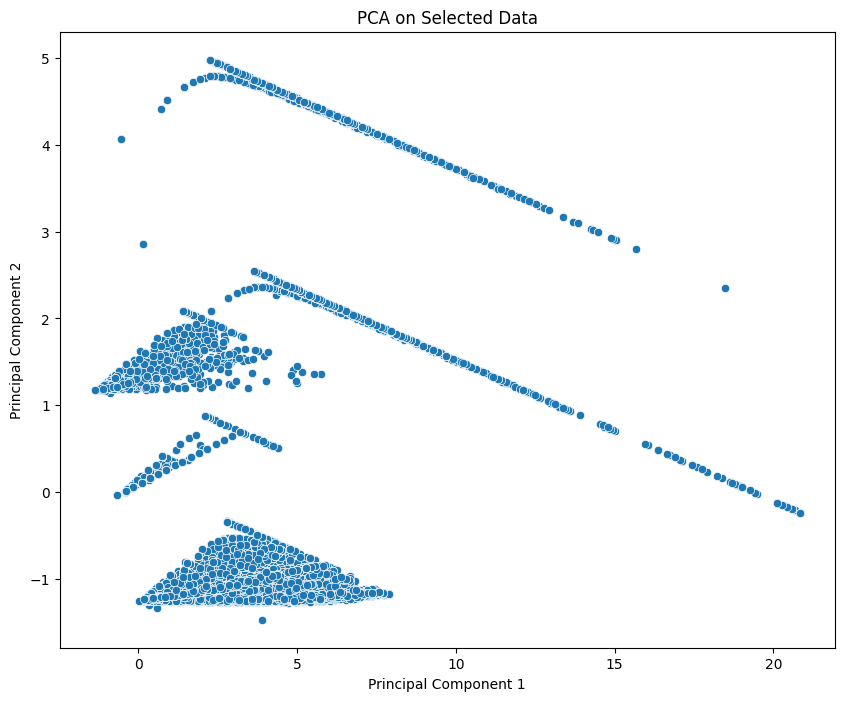

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA requires the data to be scaled, so we'll scale our data first
from sklearn.preprocessing import StandardScaler

selected_columns = ['status', 'success_billing', 'billing_success_rate', 'service rupiah']
cluster_data = subsDf[selected_columns]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA on Selected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Calculating the Explained Variance Ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the Cumulative Explained Variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

explained_variance_ratio, cumulative_explained_variance

Explained Variance Ratio:
Principal Component 1: Approximately 46.83% of the variance.
Principal Component 2: Approximately 33.64% of the variance.

Cumulative Explained Variance:
The first principal component alone captures about 46.83% of the total variance in the dataset.
The first two principal components together capture about 80.47% of the total variance.